# Set-20 Model


## Build Set-20-Dataset

Copied 600 files to ../data/train_data_chest_xray_set_20/train/PNEUMONIA and 400 files to ../data/train_data_chest_xray_set_20/val/PNEUMONIA.
Copied 120 files to ../data/train_data_chest_xray_set_20/train/NORMAL and 80 files to ../data/train_data_chest_xray_set_20/val/NORMAL.


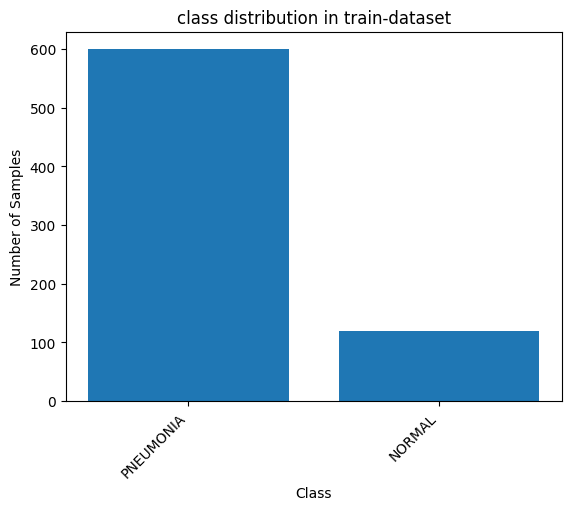

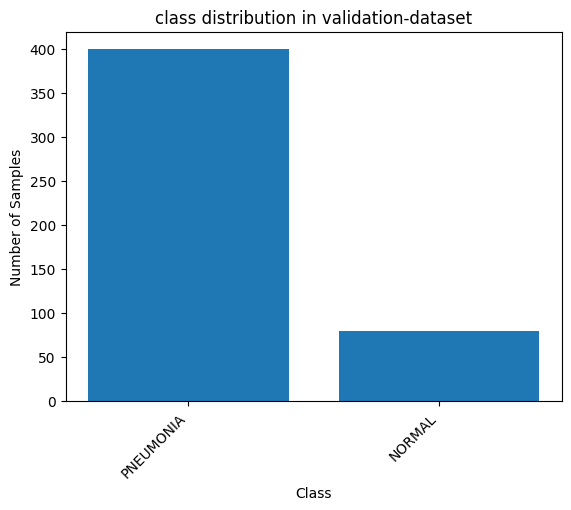

In [1]:
import shutil
import os
from dataset_splitter import copy_n_random_files
from plot_utils import plot_loss, plot_histogram_balance_of_dataset

train_data_dir = "../data/chest_xray/train/"
class1= "PNEUMONIA"
class2 = "NORMAL"
dest_folder1 = "../data/train_data_chest_xray_set_20"
dest_folder_train = os.path.join(dest_folder1, "train")
dest_folder_val = os.path.join(dest_folder1, "val")

train_split_ratio = 0.6

# Ensure folder is empty
if os.path.exists(dest_folder1):
    shutil.rmtree(dest_folder1)

copy_n_random_files(1000, os.path.join(train_data_dir, class1), os.path.join(dest_folder_train, class1), os.path.join(dest_folder_val, class1), train_split_ratio)
copy_n_random_files(200, os.path.join(train_data_dir, class2), os.path.join(dest_folder_train, class2), os.path.join(dest_folder_val, class2), train_split_ratio)

plot_histogram_balance_of_dataset(dest_folder_train, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(dest_folder_val, "class distribution in validation-dataset")

## Train Model

In [3]:
from model import Model

batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_data_dir = "../data/train_data_chest_xray_set_20/train"
val_data_dir = "../data/train_data_chest_xray_set_20/val"
test_dir = "../data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_data_dir, val_dir=val_data_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir)

In [4]:
train_losses, val_losses = model.train_model(epochs)

Epoch 1/320, Train Loss: 0.7483, Val Loss: 0.6340, Learning Rate: 0.0001, Val ECE: 0.2756, Val MCE: 0.6529, Val Acc: 0.8187, Val F1: 0.4613
Epoch 2/320, Train Loss: 0.5694, Val Loss: 0.5279, Learning Rate: 0.0001, Val ECE: 0.1211, Val MCE: 0.4761, Val Acc: 0.8333, Val F1: 0.4545
Epoch 3/320, Train Loss: 0.5104, Val Loss: 0.5026, Learning Rate: 0.0001, Val ECE: 0.0473, Val MCE: 0.3667, Val Acc: 0.8333, Val F1: 0.4545
Epoch 4/320, Train Loss: 0.4894, Val Loss: 0.4879, Learning Rate: 0.0001, Val ECE: 0.0512, Val MCE: 0.5885, Val Acc: 0.8333, Val F1: 0.4545
Epoch 5/320, Train Loss: 0.4827, Val Loss: 0.4739, Learning Rate: 0.0001, Val ECE: 0.0769, Val MCE: 0.5815, Val Acc: 0.8333, Val F1: 0.4545
Epoch 6/320, Train Loss: 0.4630, Val Loss: 0.4608, Learning Rate: 0.0001, Val ECE: 0.0968, Val MCE: 0.5717, Val Acc: 0.8333, Val F1: 0.4545
Epoch 7/320, Train Loss: 0.4530, Val Loss: 0.4480, Learning Rate: 0.0001, Val ECE: 0.1235, Val MCE: 0.5672, Val Acc: 0.8333, Val F1: 0.4545
Epoch 8/320, Train L

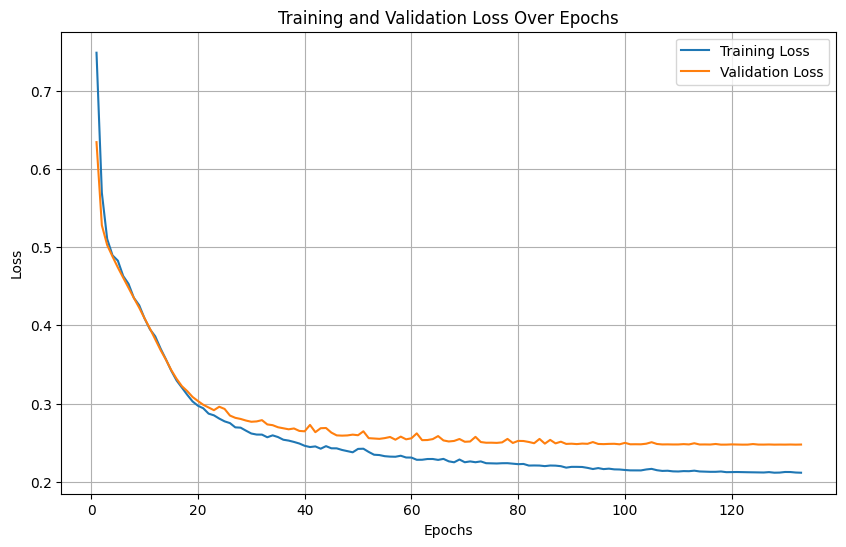

In [5]:
plot_loss(train_losses, val_losses)

In [6]:
import torch

torch.save(model.model.state_dict(), "../models/model_set_20.pth")